In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Chargement des données

file_path = 'C:/Users/benab/OneDrive/Bureau/ML-JEE/enhanced_investment_data.csv'
data = pd.read_csv(file_path)

# Afficher un aperçu des données
print("Aperçu des premières lignes du dataset :")
print(data.head())

Aperçu des premières lignes du dataset :
                             Nom  Genre        Ville  Âge    Revenu  \
0  Constance Olivier Le Lemaître  Femme        Paris   48  91061.68   
1                    Adèle Duval  Homme  Montpellier   60  95493.18   
2        Simone Masson de Collin  Femme         Nice   40  84344.87   
3          Gabrielle Pichon-Paul  Femme         Lyon   44  59332.79   
4              Martin Le Chauvin  Femme       Nantes   40  75818.07   

  Tolérance au Risque   Historique d'Investissement   Objectif Financier  \
0               Élevé          Actions, Obligations             Retraite   
1               Moyen              ETF, Fundraising  Épargne de sécurité   
2               Élevé       Obligations, Immobilier             Retraite   
3               Moyen          Actions, Obligations             Retraite   
4               Élevé  Fundraising, ETF, Immobilier     Achat immobilier   

  Secteur Préféré Fréquence d'Investissement Domaine Recommandé  
0        

In [3]:
# 1. Vérification des informations de base sur le dataset
print("\nInformations générales sur le dataset :")
print(data.info())


Informations générales sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Nom                          1000 non-null   object 
 1   Genre                        1000 non-null   object 
 2   Ville                        1000 non-null   object 
 3   Âge                          1000 non-null   int64  
 4   Revenu                       1000 non-null   float64
 5   Tolérance au Risque          1000 non-null   object 
 6   Historique d'Investissement  1000 non-null   object 
 7   Objectif Financier           1000 non-null   object 
 8   Secteur Préféré              1000 non-null   object 
 9   Fréquence d'Investissement   1000 non-null   object 
 10  Domaine Recommandé           1000 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 86.1+ KB
None


In [4]:
# 2. Vérification des valeurs manquantes
print("\nValeurs manquantes par colonne :")
print(data.isnull().sum())


Valeurs manquantes par colonne :
Nom                            0
Genre                          0
Ville                          0
Âge                            0
Revenu                         0
Tolérance au Risque            0
Historique d'Investissement    0
Objectif Financier             0
Secteur Préféré                0
Fréquence d'Investissement     0
Domaine Recommandé             0
dtype: int64


In [5]:
# 3. Suppression des doublons
print("\nNombre de doublons avant suppression :", data.duplicated().sum())
data = data.drop_duplicates()
print("Nombre de doublons après suppression :", data.duplicated().sum())


Nombre de doublons avant suppression : 0
Nombre de doublons après suppression : 0


In [6]:
# 4. Nettoyage des chaînes de caractères (suppression des espaces inutiles, mise en minuscule)
def clean_text_columns(df, columns):
    for col in columns:
        df[col] = df[col].str.strip().str.lower()
    return df

text_columns = ['Nom', 'Genre', 'Ville', 'Tolérance au Risque', 'Historique d\'Investissement',
                 'Objectif Financier', 'Secteur Préféré', 'Fréquence d\'Investissement', 'Domaine Recommandé']
data = clean_text_columns(data, text_columns)

In [7]:
# 5. Harmonisation des genres
data['Genre'] = data['Genre'].replace({'homme': 'Homme', 'femme': 'Femme'})

In [8]:
# 6. Affichage des catégories uniques dans certaines colonnes pour vérification
print("\nCatégories uniques pour Genre :")
print(data['Genre'].unique())


Catégories uniques pour Genre :
['Femme' 'Homme']


In [9]:
print("\nCatégories uniques pour Tolérance au Risque :")
print(data['Tolérance au Risque'].unique())


Catégories uniques pour Tolérance au Risque :
['élevé' 'moyen' 'faible']


In [10]:
print("\nCatégories uniques pour Fréquence d'Investissement :")
print(data['Fréquence d\'Investissement'].unique())


Catégories uniques pour Fréquence d'Investissement :
['mensuel' 'trimestriel' 'annuel']


In [11]:
# 7. Encodage optionnel (si nécessaire pour le Machine Learning)
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoded_columns = ['Genre', 'Tolérance au Risque', 'Objectif Financier', 'Secteur Préféré', 'Fréquence d\'Investissement', 'Domaine Recommandé']
for col in encoded_columns:
    data[col] = encoder.fit_transform(data[col])

In [12]:
# 8. Résumé statistique des colonnes numériques
print("\nRésumé statistique des colonnes numériques :")
print(data.describe())


Résumé statistique des colonnes numériques :
             Genre          Âge         Revenu  Tolérance au Risque  \
count  1000.000000  1000.000000    1000.000000          1000.000000   
mean      0.487000    42.039000   61025.692030             1.323000   
std       0.500081    11.038357   28184.942734             0.488784   
min       0.000000    25.000000    5843.110000             0.000000   
25%       0.000000    34.000000   40586.727500             1.000000   
50%       0.000000    42.000000   56614.175000             1.000000   
75%       1.000000    50.000000   76320.660000             2.000000   
max       1.000000    70.000000  164195.870000             2.000000   

       Objectif Financier  Secteur Préféré  Fréquence d'Investissement  \
count         1000.000000       1000.00000                 1000.000000   
mean             2.619000          3.38900                    1.716000   
std              1.760949          1.80913                    0.582824   
min              0

In [13]:
# 1. Vérification des informations de base sur le dataset
print("\nInformations générales sur le dataset :")
print(data.info())


Informations générales sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Nom                          1000 non-null   object 
 1   Genre                        1000 non-null   int32  
 2   Ville                        1000 non-null   object 
 3   Âge                          1000 non-null   int64  
 4   Revenu                       1000 non-null   float64
 5   Tolérance au Risque          1000 non-null   int32  
 6   Historique d'Investissement  1000 non-null   object 
 7   Objectif Financier           1000 non-null   int32  
 8   Secteur Préféré              1000 non-null   int32  
 9   Fréquence d'Investissement   1000 non-null   int32  
 10  Domaine Recommandé           1000 non-null   int32  
dtypes: float64(1), int32(6), int64(1), object(3)
memory usage: 62.6+ KB
None


In [14]:
# 1. Suppression de la colonne "Nom" (non utile pour le ML)
data = data.drop(columns=['Nom'])

# 2. Encodage des villes (Label Encoding)
data['Ville'] = encoder.fit_transform(data['Ville'])

In [15]:
# 3. One-Hot Encoding pour "Historique d'Investissement"
# On sépare les différentes valeurs dans chaque ligne (séparées par des virgules) pour créer des colonnes binaires
investment_types = set()
data['Historique d\'Investissement'].apply(lambda x: investment_types.update(x.split(',')))

# Créer des colonnes binaires pour chaque type d'investissement
for investment_type in investment_types:
    investment_type = investment_type.strip().lower()  # Nettoyage des espaces et minuscule
    data[f"invest_{investment_type}"] = data['Historique d\'Investissement'].apply(lambda x: 1 if investment_type in x.lower() else 0)

# Supprimer la colonne "Historique d'Investissement" une fois encodée
data = data.drop(columns=['Historique d\'Investissement'])


In [16]:
# 1. Vérification des informations de base sur le dataset
print("\nInformations générales sur le dataset :")
print(data.info())


Informations générales sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Genre                                          1000 non-null   int32  
 1   Ville                                          1000 non-null   int32  
 2   Âge                                            1000 non-null   int64  
 3   Revenu                                         1000 non-null   float64
 4   Tolérance au Risque                            1000 non-null   int32  
 5   Objectif Financier                             1000 non-null   int32  
 6   Secteur Préféré                                1000 non-null   int32  
 7   Fréquence d'Investissement                     1000 non-null   int32  
 8   Domaine Recommandé                             1000 non-null   int32  
 9   invest_fundr

In [17]:
# Encodage de la colonne cible avec LabelEncoder
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['Domaine Recommandé'] = encoder.fit_transform(data['Domaine Recommandé'])

# Affichage des correspondances (catégorie -> valeur numérique)
label_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print("Mapping des valeurs encodées :", label_mapping)


Mapping des valeurs encodées : {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}


In [18]:
# 9. Sauvegarde du dataset nettoyé
#cleaned_file_path = "newdata1.csv"
#data.to_csv(cleaned_file_path, index=False)
#print(f"\nDataset nettoyé sauvegardé sous : {cleaned_file_path}")

In [19]:
# Trouver les colonnes de type 'object'
object_columns = data.select_dtypes(include=['object']).columns

# Initialiser un dictionnaire pour sauvegarder les mappings
encoders = {}
encoded_data = data.copy()

# Encoder chaque colonne de type 'object'
for col in object_columns:
    encoder = LabelEncoder()
    encoded_data[col] = encoder.fit_transform(encoded_data[col])
    encoders[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))  # Sauvegarder le mapping pour chaque colonne

# Affichage des encodages réalisés
print("\nMappings des colonnes encodées :")
for col, mapping in encoders.items():
    print(f"\n{col} : {mapping}")
# Aperçu des données encodées
print("\nAperçu des premières lignes des données encodées :")
print(encoded_data.head())
# Sauvegarder le dataset encodé si besoin
#encoded_file_path = "encoded_user_investment_data.csv"
#encoded_data.to_csv(encoded_file_path, index=False)
#print(f"\nDataset encodé sauvegardé sous : {encoded_file_path}")



Mappings des colonnes encodées :

Aperçu des premières lignes des données encodées :
   Genre  Ville  Âge    Revenu  Tolérance au Risque  Objectif Financier  \
0      0      7   48  91061.68                    2                   2   
1      1      4   60  95493.18                    1                   6   
2      0      6   40  84344.87                    2                   2   
3      0      2   44  59332.79                    1                   2   
4      0      5   40  75818.07                    2                   0   

   Secteur Préféré  Fréquence d'Investissement  Domaine Recommandé  \
0                5                           1                   0   
1                4                           2                   4   
2                2                           1                   0   
3                3                           2                   3   
4                5                           2                   2   

   invest_fundraising  invest_etf  invest_

In [20]:
# 1. Vérification des informations de base sur le dataset
print("\nInformations générales sur le dataset :")
print(data.info())


Informations générales sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Genre                                          1000 non-null   int32  
 1   Ville                                          1000 non-null   int32  
 2   Âge                                            1000 non-null   int64  
 3   Revenu                                         1000 non-null   float64
 4   Tolérance au Risque                            1000 non-null   int32  
 5   Objectif Financier                             1000 non-null   int32  
 6   Secteur Préféré                                1000 non-null   int32  
 7   Fréquence d'Investissement                     1000 non-null   int32  
 8   Domaine Recommandé                             1000 non-null   int64  
 9   invest_fundr

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Séparation des variables explicatives (X) et cible (y)
X = encoded_data.drop(columns=['Domaine Recommandé'])  # Features
y = encoded_data['Domaine Recommandé']  # Target

# Division en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation du modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prédictions et évaluation
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle Random Forest : {accuracy * 100:.2f}%")


Précision du modèle Random Forest : 81.50%


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import warnings


# Séparation des variables explicatives (X) et de la cible (y)
X = data.drop(columns=['Domaine Recommandé'])  # Features
y = data['Domaine Recommandé']  # Target

# Division en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Modèles qui n'ont pas besoin de standardisation/normalisation
models_without_scaling = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

print("\n**Résultats des modèles sans normalisation/standardisation :**")
for model_name, model in models_without_scaling.items():
    # Entraînement
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} - Précision : {accuracy * 100:.2f}%")


**Résultats des modèles sans normalisation/standardisation :**
Random Forest - Précision : 81.50%


c:\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:16:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Précision : 83.00%
Decision Tree - Précision : 80.00%


In [23]:
# Importation des bibliothèques nécessaires
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Séparation des variables explicatives et de la cible
X = data.drop(columns=['Domaine Recommandé'])  # Features
y = data['Domaine Recommandé']  # Target

# Division en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèles de Boosting
boosting_models = {
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42)
}

# Stocker les résultats dans un dictionnaire
accuracy_results = {}

print("\n**Résultats des modèles de Boosting :**")
for model_name, model in boosting_models.items():
    # Entraînement
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calcul de l'accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[model_name] = accuracy * 100
    print(f"{model_name} - Précision : {accuracy * 100:.2f}%")

# Affichage des résultats
print("\nRésumé des précisions des modèles de Boosting :")
for model_name, acc in accuracy_results.items():
    print(f"{model_name} : {acc:.2f}%")


**Résultats des modèles de Boosting :**


c:\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:16:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Précision : 83.00%


c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost - Précision : 66.00%
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 350
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 17
[LightGBM] [Info] Start training from score -1.673976
[LightGBM] [Info] Start training from score -4.605170
[LightGBM] [Info] Start training from score -1.199815
[LightGBM] [Info] Start training from score -1.268511
[LightGBM] [Info] Start training from score -1.566618
[LightGBM] [Info] Start training from score -4.487387
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [24]:
# Standardisation des colonnes continues (Âge et Revenu)
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[['Âge', 'Revenu']] = scaler.fit_transform(X_train[['Âge', 'Revenu']])
X_test_scaled[['Âge', 'Revenu']] = scaler.transform(X_test[['Âge', 'Revenu']])

# Modèles qui ont besoin de standardisation/normalisation
models_with_scaling = {
    "Logistic Regression": LogisticRegression(multi_class='multinomial', max_iter=1000),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(n_neighbors=5),
    "SVM (Support Vector Machine)": SVC(kernel='linear', probability=True)
}

print("\n**Résultats des modèles avec normalisation/standardisation :**")
for model_name, model in models_with_scaling.items():
    # Entraînement
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} - Précision : {accuracy * 100:.2f}%")



**Résultats des modèles avec normalisation/standardisation :**
Logistic Regression - Précision : 62.00%
K-Nearest Neighbors (KNN) - Précision : 67.50%


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVM (Support Vector Machine) - Précision : 68.50%



**Évaluation des modèles sans normalisation/standardisation :**

--- Random Forest ---
Précision globale : 81.50%

Rapport de classification :
              precision    recall  f1-score   support

           0       0.48      0.42      0.45        31
           1       0.00      0.00      0.00         1
           2       0.73      0.76      0.74        63
           3       0.95      1.00      0.98        59
           4       1.00      0.98      0.99        44
           5       0.00      0.00      0.00         2

    accuracy                           0.81       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.80      0.81      0.81       200


--- XGBoost ---
Précision globale : 83.00%

Rapport de classification :
              precision    recall  f1-score   support

           0       0.47      0.48      0.48        31
           1       0.00      0.00      0.00         1
           2       0.76      0.75      0.75        63
           3       1.00

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: Unde

              precision    recall  f1-score   support

           0       0.33      0.26      0.29        31
           1       0.00      0.00      0.00         1
           2       0.69      0.76      0.72        63
           3       1.00      1.00      1.00        59
           4       1.00      1.00      1.00        44
           5       0.33      0.50      0.40         2

    accuracy                           0.80       200
   macro avg       0.56      0.59      0.57       200
weighted avg       0.79      0.80      0.79       200


**Évaluation des modèles avec normalisation/standardisation :**

--- Logistic Regression ---
Précision globale : 62.00%

Rapport de classification :
              precision    recall  f1-score   support

           0       0.37      0.32      0.34        31
           1       0.00      0.00      0.00         1
           2       0.62      0.52      0.57        63
           3       0.64      0.90      0.75        59
           4       0.76      0.64   

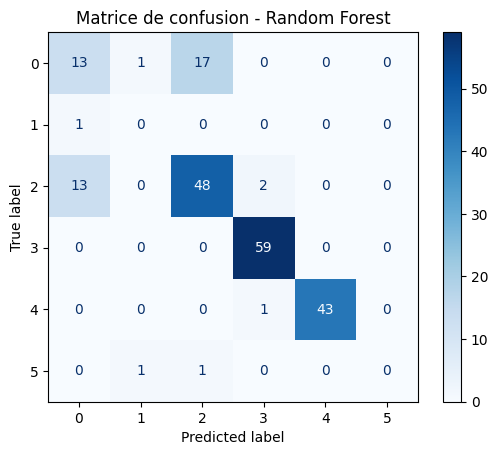

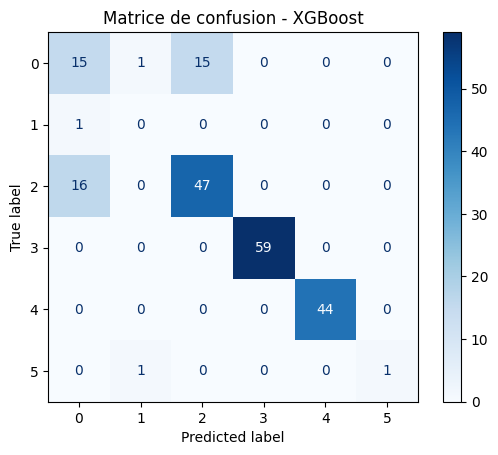

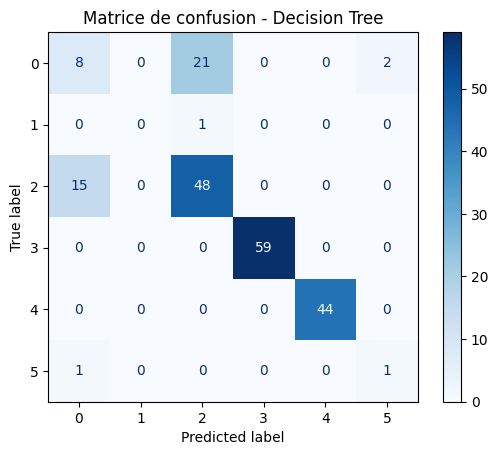

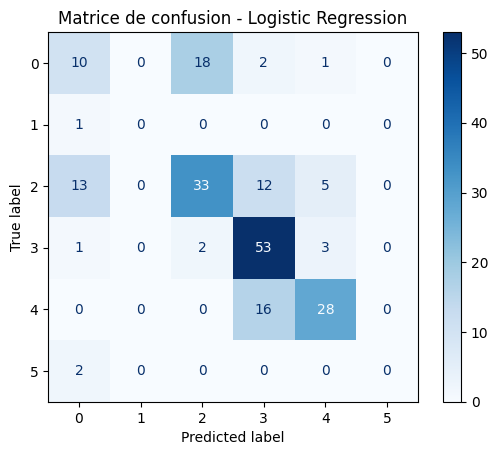

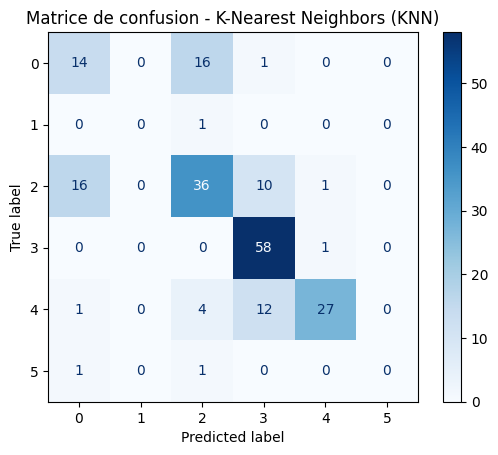

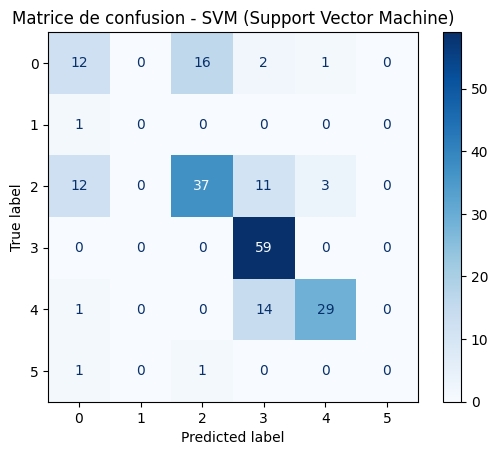

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Fonction d'évaluation des modèles
def evaluate_model(model, model_name, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"\n--- {model_name} ---")
    print(f"Précision globale : {accuracy_score(y_test, y_pred) * 100:.2f}%")
    
    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    disp.ax_.set_title(f'Matrice de confusion - {model_name}')
    
    # Rapport de classification
    print("\nRapport de classification :")
    print(classification_report(y_test, y_pred))

# Évaluation des modèles sans normalisation/standardisation
print("\n**Évaluation des modèles sans normalisation/standardisation :**")
for model_name, model in models_without_scaling.items():
    evaluate_model(model, model_name, X_test, y_test)

# Évaluation des modèles avec normalisation/standardisation
print("\n**Évaluation des modèles avec normalisation/standardisation :**")
for model_name, model in models_with_scaling.items():
    evaluate_model(model, model_name, X_test_scaled, y_test)


In [26]:
# Sauvegarder le dataset encodé si besoin
#encoded_file_path = "data.csv"
#encoded_data.to_csv(encoded_file_path, index=False)
#print(f"\nDataset encodé sauvegardé sous : {encoded_file_path}")

In [27]:
import pickle

# Enregistrer le modèle entraîné
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Modèle enregistré dans 'model.pkl'")


Modèle enregistré dans 'model.pkl'


In [28]:
print(model.feature_names_in_)


['Genre' 'Ville' 'Âge' 'Revenu' 'Tolérance au Risque' 'Objectif Financier'
 'Secteur Préféré' "Fréquence d'Investissement" 'invest_fundraising'
 'invest_etf' 'invest_actions' 'invest_immobilier' 'invest_obligations'
 'invest_investissement socialement responsable' 'invest_cryptomonnaies'
 'invest_startups' 'invest_matières premières']
